In [1]:
#Berke Martin (YTJ72G), Guba Zoltán (HK6EKC)
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq, fftshift, ifftshift
import cmath

In [2]:
l0 = 0.276 #scaling factor

In [3]:
def gaussian_packet(x,s,x0,k0): #initializing Gaussian wavepacket with initial position x0, initial wavenumber k0 and size s
    factor = 1/(2*np.pi*s**2)**0.25 #norm factor
    exp1 = np.exp(-(x-x0)**2/(4*(s)**2)) #first exponential factor
    exp2 = np.exp(1j*k0*x) #bosst with initial wavenumber k0

    return factor*exp1*exp2 #return the result (complex valued function!)

In [4]:
def square_potential(xs,a,V0): #creating potential on given interval with width of a and height of V0
    Vx = [] #add potential values to list
    for x in  xs:
        if x>=-a/2 and x<=a/2: #condition for potential shape
            Vx.append(V0)
        else:
            Vx.append(0)
    return np.array(Vx) #return array

In [5]:
def ite(psi, Vx, t, dx, N, itnum): #iteration using the split operator method
    dt = t / itnum #time resolution is depending on iteration number and time
    snapshots = [psi] #we will save the wavefunction at every iteration step, save psi0

    snapshots.append(psi)
    for i in range(itnum):
        ks = np.linspace(-np.pi/dx,np.pi/dx,N)

        psi_1 = np.exp(-1j*dt*Vx/2)*snapshots[-1] #half step evolution with the potential term
        psi_2 = fftshift(fft(psi_1)) #Fourier transform to wavenumber space
        psi_3 = psi_2 * np.exp(-1j*dt*ks**2/2) #full step evolution with the (now diagonal) kinetic term
        psi_4 = ifft(ifftshift(psi_3)) #inverse Fourier transform
        psi_5 = np.exp(-1j*dt*Vx/2) * psi_4 #half step evolution with the potential
        
        snapshots.append(psi_5) #adding the wavefunction at time t+dt to the snapshots
        
    return np.array(snapshots) #returning the snapshots for later analysis

In [6]:
#Reference for calcualtions:
#https://www.cond-mat.de/teaching/QM/JSim/wpack.html and lecture notes
E0, DE = 2.5, 0.08 #initial energy and energy range from which we choose wavenumbers
#I played around with the energy interval until I found this value

k0 = np.sqrt(2*E0) #wavenumber corresponding to E0

Dk = E0/k0 #Dk is the spread of the packet in momentum space
Dx = 0.5/Dk #spread in real space
s = 0.5*k0/DE


N = 2000 #resolve position interval
x_size = max(100, 10*Dx)/l0 #size of the system
x = np.linspace(-x_size, x_size, N) #create array with positions
dx = x[1]-x[0] #step size in interval
kk = np.linspace(-np.pi/dx,np.pi/dx,N) #possible wavenumber values

t_it = x_size/k0 #iteration time
x0 = -x_size/2 #initial position of the wavepacket (far enough from the potential)

In [7]:
a = 1/l0 #barrier width
V0 = 2 #barrier height
Vx = square_potential(xs = x ,V0 = V0, a = a) #potential
t = t_it #simulation runs for t_it time
psi = gaussian_packet(x = x, s = s, k0 = k0, x0 = -2*x_size/4) #initial wavefunction
psis = ite(psi = psi, Vx = Vx, t = t, dx = dx, N = N, itnum = 5000) #iteration

# Investigation of the time evolution of the wavepacket

In the following I will check the time evolution of the wavepacket in several snapshots (I could not realize the interactive plot, but this is not the important part) and see if it 'stable'. We will also see how the wavepacket approaches the potential barrier and how the interaction takes place.

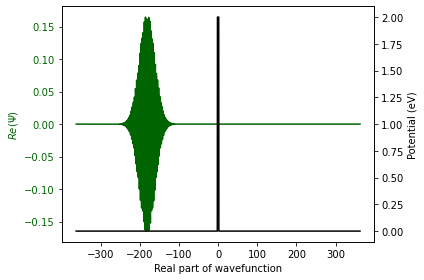

In [8]:
fig, ax1 = plt.subplots()

color = 'darkgreen'
ax1.set_xlabel('Real part of wavefunction')
ax1.set_ylabel('$Re(\Psi)$', color=color)
ax1.plot(x, np.real(psis[0]), color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('Potential (eV)', color=color)  # we already handled the x-label with ax1
ax2.plot(x, Vx, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

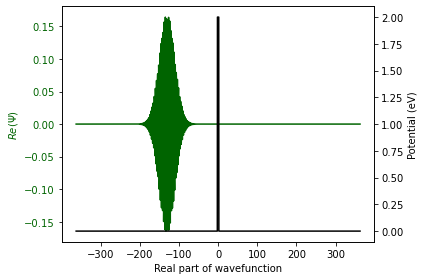

In [9]:
fig, ax1 = plt.subplots()

color = 'darkgreen'
ax1.set_xlabel('Real part of wavefunction')
ax1.set_ylabel('$Re(\Psi)$', color=color)
ax1.plot(x, np.real(psis[700]), color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('Potential (eV)', color=color)  # we already handled the x-label with ax1
ax2.plot(x, Vx, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

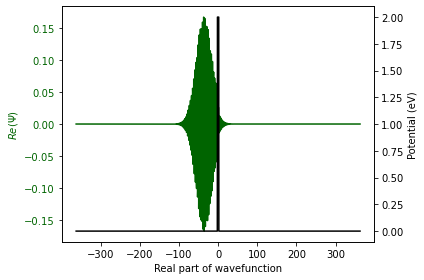

In [10]:
fig, ax1 = plt.subplots()

color = 'darkgreen'
ax1.set_xlabel('Real part of wavefunction')
ax1.set_ylabel('$Re(\Psi)$', color=color)
ax1.plot(x, np.real(psis[2000]), color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('Potential (eV)', color=color)  # we already handled the x-label with ax1
ax2.plot(x, Vx, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

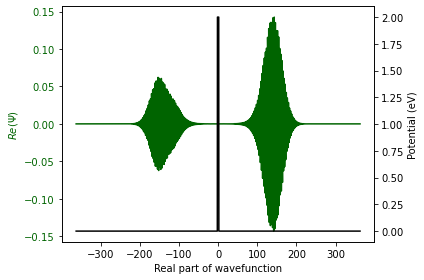

In [11]:
fig, ax1 = plt.subplots()

color = 'darkgreen'
ax1.set_xlabel('Real part of wavefunction')
ax1.set_ylabel('$Re(\Psi)$', color=color)
ax1.plot(x, np.real(psis[4500]), color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('Potential (eV)', color=color)  # we already handled the x-label with ax1
ax2.plot(x, Vx, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

SANITY CHECK:
(1.0000000000008011+0j)


/Users/berkemartin/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


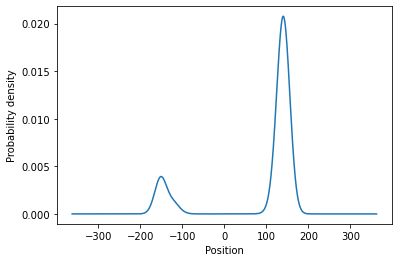

In [12]:
probability_density = psis[4500]*np.conj(psis[4500]) #getting the density after the wapacket interacted with the potential
# I found this value by playing around with the energy spread and dynamics, see comments on this part below
plt.plot(x,probability_density) 
plt.ylabel('Probability density')
plt.xlabel('Position')
prob_left = 0 #calcualting the porbabilty on the left and on the right of potential
prob_right = 0
for i in range(len(x)):
    if x[i] <= 0:
        prob_left += probability_density[i]*dx
    elif x[i] > 0:
        prob_right += probability_density[i]*dx
print('SANITY CHECK:')
print(prob_left+prob_right)

In [13]:
print('TRANSMISSION PARAMETER:')
print(prob_right/(prob_left+prob_right))

TRANSMISSION PARAMETER:
(0.8237331054855636+0j)


In [14]:
#Comparing with plane wave scattering:
def T_theory(E): #for details see 'Kvantummechanika 1 Szemelvények', page 43
    V0 = 2
    a = 1
    m_e = 9.10938356*1e-31 #factor in the theoretical fomrula will be calculated
    E0 = 1.60217662*1e-19
    hbar = 1.0545718*1e-34
    factor = 2*m_e*E0*a*a*1e-18 / hbar / hbar
    
    argument = cmath.sqrt(factor*(V0-E))
    numerator = V0*V0*np.sinh(argument)*np.sinh(argument)
    denominator = 4*E*(V0-E)
    return 1/(1+numerator/denominator)


print('TRANSMISSION PARAMETER FROM PLANE WAVE SCATTERING:')
print(T_theory(2.5))

TRANSMISSION PARAMETER FROM PLANE WAVE SCATTERING:
(0.8537741827420464+0j)


# Conclusion

From last lectures simulation we can recall that if the energy of the particle is higher then the potential barrier than the transmission probability will be comparable to one, even for resonance 'peaks' the minimum of the transmission parameter is higher than 0.5. In this simulation the energy range [$E_0-DE/2,E_0+DE/2$] (eV) and the barrier height was set to $V_0$ (where $E_0>V_0$), so we expect 'high' transmission ratio. This case is obviously more complicated because we have a Gaussian wavepacket, but the plane wave components energy is above 2 eV (barrier height) so the result seems plausible.

#### Question: what are the "secondary" waves in some plots if we choose "high" energy spread? (Not visible if you change energy from 2.5 eV to 5 eV but keep energy spread or keep energy at 2.5 eV but lower energy spread e.g. to 0.05 )
#### Proposed answer: the energy spread influences the dynamics, one could write a code that optimizes the energy spread for a given energy and simulation interval, for now I will not try that but maybe later it would be a good practice. For this result I manually tuned the energy spread.

#### One can also see that the Transmission parameter obtained from plane wave scattering is close to the Transmission parameter of the wavepacket. This scenario will be investigated in more detail in the homework. 